# Non-interacting band structure

In [1]:
%matplotlib inline
import numpy as np
from quant_met import geometry, mean_field, plotting

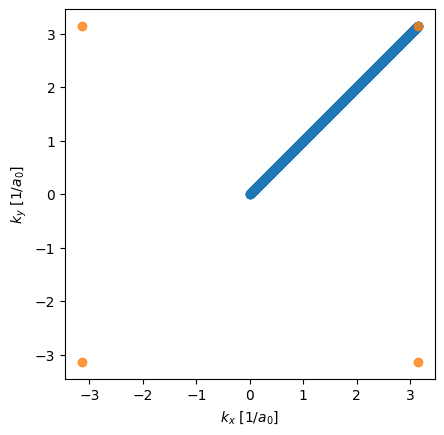

In [6]:
square_lattice = geometry.SquareLattice()
n = 1000  # number of points across the whole k space path
band_path, band_path_plot, ticks, labels = square_lattice.generate_high_symmetry_path(
    number_of_points=n
)

BZ_path_plot = plotting.scatter_into_bz(square_lattice.bz_corners, band_path)

square_h = mean_field.OneBandTightBindingHamiltonian(
    hopping=1,
    lattice_constant=square_lattice.lattice_constant,
    chemical_potential=0,
    hubbard_int=4,
    delta=np.array([1]),
)

bdg_h = square_h.bdg_hamiltonian(k=np.array([np.array([0, 0]), np.array([1, 1])]))

band_structure = square_h.calculate_bandstructure(band_path)

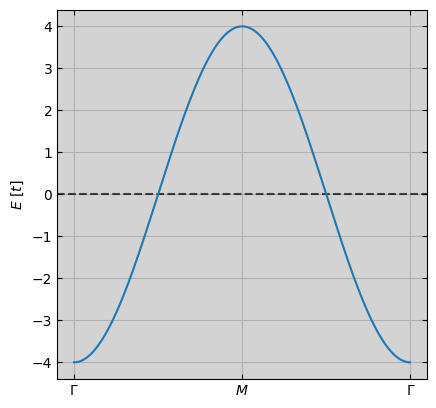

In [7]:
fig = plotting.plot_bandstructure(
    bands=band_structure[["band"]].to_numpy().T,
    k_point_list=band_path_plot,
    labels=labels,
    ticks=ticks,
)

In [8]:
solved_h = mean_field.self_consistency_loop(h=square_h, number_of_k_points=100, epsilon=1e-9)

Old: [79.6420723]
New: [-1.9993573-0.j]
Difference [77.64271496]
81.64142964276546
Old: [-1.9993573-0.j]
New: [1.5553093+0.j]
Difference [0.44404805]
3.5546665
Old: [1.5553093+0.j]
New: [-1.4345561-0.j]
Difference [0.12075317]
2.9898653
Old: [-1.4345561-0.j]
New: [1.3940179+0.j]
Difference [0.04053819]
2.8285742
Old: [1.3940179+0.j]
New: [-1.3795048-0.j]
Difference [0.01451313]
2.7735229
Old: [-1.3795048-0.j]
New: [1.3741912+0.j]
Difference [0.00531363]
2.753696
Old: [1.3741912+0.j]
New: [-1.3722299-0.j]
Difference [0.00196123]
2.746421
Old: [-1.3722299-0.j]
New: [1.3715038+0.j]
Difference [0.0007261]
2.743734
Old: [1.3715038+0.j]
New: [-1.3712347-0.j]
Difference [0.00026917]
2.7427385
Old: [-1.3712347-0.j]
New: [1.3711349+0.j]
Difference [9.9778175e-05]
2.7423697
Old: [1.3711349+0.j]
New: [-1.3710979-0.j]
Difference [3.695488e-05]
2.7422328
Old: [-1.3710979-0.j]
New: [1.3710842+0.j]
Difference [1.3709068e-05]
2.7421823
Old: [1.3710842+0.j]
New: [-1.3710791-0.j]
Difference [5.1259995e-

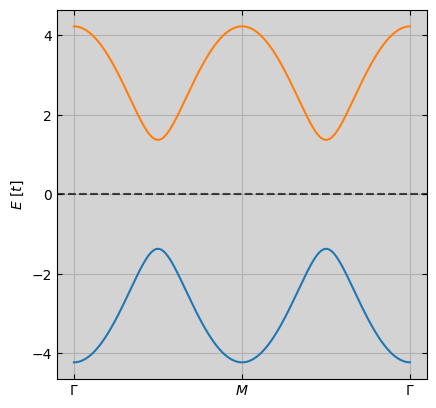

In [9]:
bdg_bands, bdg_wavefunctions = solved_h.diagonalize_bdg(k=band_path)

fig = plotting.plot_bandstructure(
    bands=bdg_bands.T,
    k_point_list=band_path_plot,
    labels=labels,
    ticks=ticks,
)